In [1]:
import yaml
from context import Benchmark, Evaluator
from context import Dataset
from context import Predictor_CVM
from context import Predictor_sof, Predictor_zan, Predictor_kara
import random
import numpy as np
from smac_optimizer import SmacOptimizer

['/home/rua7rng/code/the-atlas-benchmark/Trajectron-plus-plus/trajectron', '/home/rua7rng/code/the-atlas-benchmark/src', '/home/rua7rng/code/the-atlas-benchmark/demo', '/home/rua7rng/.vscode/extensions/ms-toolsai.jupyter-2022.2.1030672458/pythonFiles', '/home/rua7rng/.vscode/extensions/ms-toolsai.jupyter-2022.2.1030672458/pythonFiles/lib/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/rua7rng/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/rua7rng/.local/lib/python3.8/site-packages/IPython/extensions', '/home/rua7rng/.ipython', '..', '..', '..', '..']


/usr/lib/python3/dist-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


Create the dataset object based on the yaml file configuration

In [2]:
# Tested this instruction for the following datasets
# input_benchmark_cfg_path = '../cfg/dataset_config_hotel.yaml'
input_benchmark_cfg_path = '../cfg/dataset_config_eth.yaml'
# input_benchmark_cfg_path = '../cfg/dataset_config_thor1.yaml'
# input_benchmark_cfg_path = '../cfg/dataset_config_thor3.yaml'
# input_benchmark_cfg_path = '../cfg/dataset_config_atc.yaml'
# input_benchmark_cfg_path = '../cfg/dataset_config_test_traj.yaml'
# input_benchmark_cfg_path = '../cfg/dataset_config_test_point_obstacles.yaml'

with open(input_benchmark_cfg_path, 'r') as file:
    benchmark_cfg = yaml.load(file, Loader=yaml.FullLoader)

observation_len = benchmark_cfg['benchmark']['setup']['observation period']
prediction_horizon = benchmark_cfg['benchmark']['setup']['prediction horizon']

# Optional split parameter defines the portion of the dataset that is being extracted,
# frames between 0 * length(dataset) and 1 * length(dataset)
dataset_train = Dataset(benchmark_cfg, split=[0,0.2])
valid_scenes_train = dataset_train.extract_scenarios(prediction_horizon,observation_len,min_num_prople=2)
dataset_test = Dataset(benchmark_cfg, split=[0.2,1])
valid_scenes_test = dataset_test.extract_scenarios(prediction_horizon,observation_len,min_num_prople=2)

The eth dataset has 24 valid scenes with observation length 6 and prediction horizon 10 out of 633 scenes total.
The eth dataset has 31 valid scenes with observation length 6 and prediction horizon 10 out of 1296 scenes total.


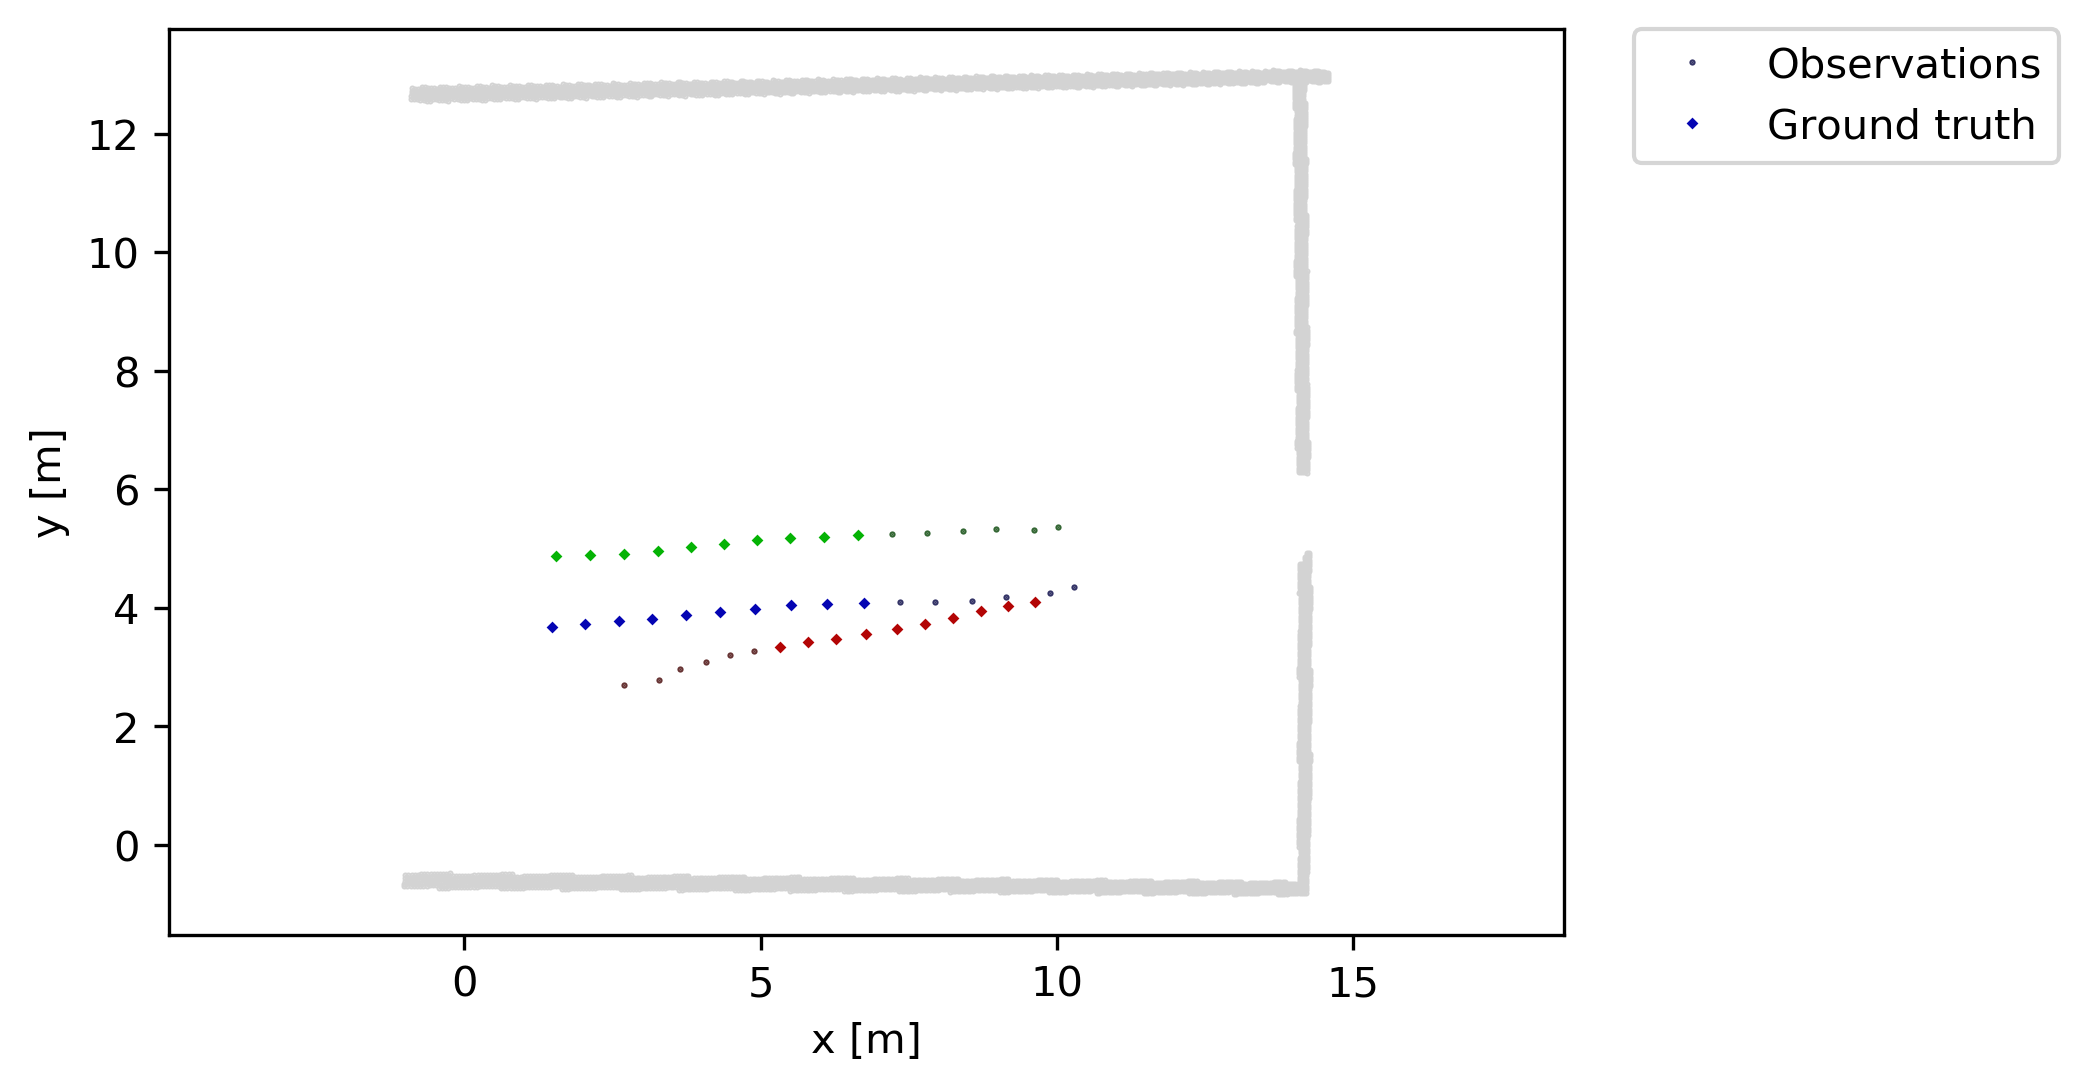

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

evaluation = Evaluator(set_GT_length=prediction_horizon)

#evaluation.evaluate_scenario_ade_fde(valid_scenes[19], predictions)
evaluation.plot_scenario(dataset_test, valid_scenes_train[11])

Preparing some predictors to be evaluated

In [4]:
with open('../cfg/method_config_cvm.yaml', 'r') as file:
    method_cfg = yaml.load(file, Loader=yaml.FullLoader)
predictor_cvm = Predictor_CVM(dataset_train, method_cfg)

with open('../cfg/method_config_sof.yaml', 'r') as file:
    method_cfg = yaml.load(file, Loader=yaml.FullLoader)
predictor_sof = Predictor_sof(dataset_train, method_cfg)

Setting up the benchmark

In [5]:
bench = Benchmark(verbose = False)
fde_value = bench.accuracy_experiment(valid_scenes_test, predictor_cvm, metric='fde')
print("Constant velocity model reaches FDE =", fde_value)
#bench.accuracy_experiment(valid_scenes_test, predictor_sof)

Constant velocity model reaches FDE = 0.6926225956012078


In [6]:
input_method_cfg_path = '../cfg/method_config_kara.yaml'
e = SmacOptimizer(input_method_cfg_path, input_benchmark_cfg_path, dataset_train_split=[0,0.2], min_num_prople=2, iterations=300, metric='fde')
# !!! Be careful with this one, becaise it will overwrite the optimal values in the method_cfg file
# e.optimize()

The eth dataset has 24 valid scenes with observation length 6 and prediction horizon 10 out of 633 scenes total.
0.6611648832891078
Default Value: 0.66
Optimizing! Depending on your machine, this might take a few minutes.
0.6611648832891078
0.738575779672717
0.660737779010478
0.6939057572563964
0.6822183415554409
0.661846634559268
0.6616240926888005
0.6840100058622259
0.6617035201313226
0.6613895088025648
0.6607999172159826
0.6603851166976801
1.0024632345972586
0.6622572052586254
0.6616915269372575
0.6606767012662002
0.663403070719539
0.9326785924270126
0.9017235889739358
0.660115880492935
0.6600628760293433
0.660328936376354
0.6614976668740605
0.6599697071147365
0.6605062394387805
0.6598359646291078
0.7831776692646715
0.6759309248388723
0.7377131902668843
0.6597409130054609


KeyboardInterrupt: 

In [7]:
bench.verbose = True
with open(input_method_cfg_path, 'r') as file:
    method_cfg = yaml.load(file, Loader=yaml.FullLoader)

print("With default parameters the model reaches:")
predictor_default = Predictor_kara(dataset_train, method_cfg)
fde_value = bench.accuracy_experiment(valid_scenes_train, predictor_default, metric='fde')

print("With optimal parameters the model reaches:")
predictor_optimal = Predictor_kara(dataset_train, method_cfg, parameters=['optimal','eth'])
fde_value = bench.accuracy_experiment(valid_scenes_train, predictor_optimal, metric='fde')

With default parameters the model reaches:
The mean ADE is 0.314632028651134 +- 0.10641205175749549
The mean FDE is 0.6611648832891078 +- 0.2790693800982923
With optimal parameters the model reaches:
The mean ADE is 0.3152534365346555 +- 0.1114063615024998
The mean FDE is 0.6580700040580344 +- 0.28201045025621513
